# Bhaskar Barman 
# 21ms147

# Q1

In [344]:
def verlet(f2,x,yn,ynm1,h):
    ynp1 = 2*yn - ynm1 + f2(x,yn)*h**2
    return ynp1

def vel_verlet(f1,f2,y,t,h):
    return np.array(y+f1(1,y)*h+f2(1,y)*(h**2)/2)
def rk4(f1,y,t,h):
    k1=h*f1(t,y)
    k2=h*f1(t+h/2,y+k1/2)
    k3=h*f1(t+h/2,y+k2/2)
    k4=h*f1(t+h,y+k3)
 
    return y+(k1+2*k2+2*k3+k4)/6



In [345]:
def euler(f1,y,x,h):
    return np.array(y+h*(f1(x,y)))

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from math import log10

pi=np.pi

In [347]:
def f1(x,y):
    sd = np.array([y[1],-4*pi**2*y[0]])
    return sd

def f2(x,y):
    dd = np.array([-4*pi**2*y[0],-4*pi**2*y[1]])
    return dd

In [348]:
def caller1(method,fn,yin,pin,tin,tf,h):
    N = int((tf-tin)/h)+1
    ts=np.arange(tin,tf+h,h)
    ys = np.zeros((N,2))
    ini = np.array([yin,pin])
    ys[0] = ini
    for i in range(1,N):
        if method == verlet and i==1:
            value = ys[0] +  f1(1,ys[0])*h + f2(1,ys[0])*h**2
            ys[i] = value
            
        if i!=1:
            ys[i] = method(fn,1,ys[i-1],ys[i-2],h)      
    return ys,N*h
    verlet,ini,0,15,h[i],f1,f2

In [349]:
def caller2(method,ini,t_ini,t_final,h,f1,f2):
 N=int((t_final-t_ini)/h)+1
 a=np.zeros((int(N),2))
 a[0]=ini  
 for i in range(1,N):
        value=ini
        if method == vel_verlet:
            value=method(f1,f2,a[i-1],1,h)
            a[i]=value
        if method==rk4 :
            value=method(f1,a[i-1],t_ini,h)
            a[i]=value 
        if method==euler:
            value=method(f1,a[i-1],0,h)
            a[i]=value             
 return a, N*h

# a)

# verlet

In [350]:
a,l = caller1(verlet,f2,1,0,0,15,0.01)

y_arr = a[:,0]
p_arr=a[:,1] 
len(y_arr)

1501

In [351]:
t_arr=np.arange(0,15+0.01,0.01)
y_actual = np.cos(2*pi*t_arr)
p_actual = -2*pi*np.sin(2*pi*t_arr)

In [352]:
len(t_arr)

1501

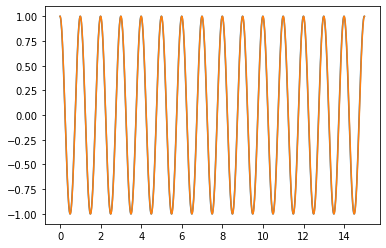

In [353]:
t_arr=np.arange(0,15+0.01,0.01)
plt.plot(t_arr,y_arr)
plt.plot(t_arr,y_actual)

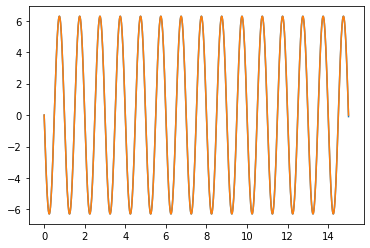

In [354]:
plt.plot(t_arr,p_arr)
plt.plot(t_arr,p_actual)

# velocity verlet

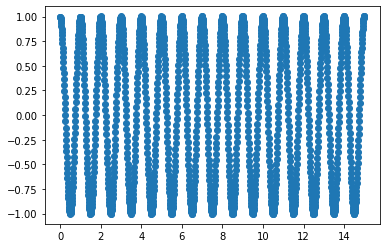

In [355]:
ini=np.array([1,0])
h=0.01
a,l=caller2(vel_verlet,ini,0,15,h,f1,f2)
y=np.zeros(int(len(a)))
p=np.zeros(int(len(a)))
for i in range(len(a)):
    y[i]=a[i][0]
    p[i]=a[i][1]
h=0.01
t=np.arange(0,15+h,h)     
plt.scatter(t,y)
plt.plot(t,y_actual)



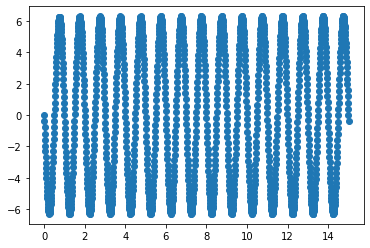

In [356]:
plt.scatter(t,p)
plt.plot(t,p_actual)

# runge kutta 4

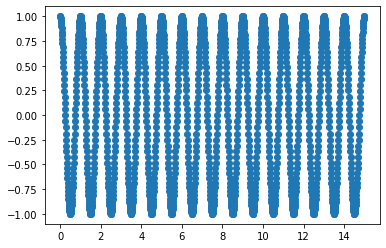

In [357]:
ini=np.array([1,0])
h=0.01
a,l=caller2(rk4,ini,0,15,h,f1,f2)
y=np.zeros(int(len(a)))
p=np.zeros(int(len(a)))
for i in range(len(a)):
    y[i]=a[i][0]
    p[i]=a[i][1]
h=0.01
t=np.arange(0,15+h,h)     
plt.scatter(t,y)
plt.plot(t,y_actual)


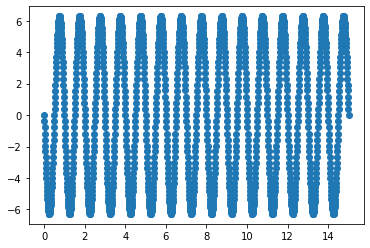

In [358]:
plt.scatter(t,p)
plt.plot(t,p_actual)

# b)

# error 

In [359]:
# h=[]
# n=np.arange(-4,-2.2,0.2)

# for i in range(len(n)):
#     y=10**n[i]
#     h.append(float(y))
# print(len(h))

# error_verlet=np.zeros(len(h))
# error_vel_verlet = np.zeros(int(len(h)))
# error_rk4 = np.zeros(int(len(h)))
# for i in range(len(h)):
#     t=np.arange(0,15+h[i],h[i]) 
#     #a1,l=caller1(verlet,f2,1,0,0,15,0.01)
#     a2,l=caller2(vel_ver,ini,0,15,h[i],f1,f2)
#     a3,l=caller2(RK4,ini,0,15,h[i],f1,f2)
#     error_verlet[i]=np.abs(a1[-1][0]-np.cos(2*pi*(l)))
#     error_vel_verlet[i]=np.abs(a2[-1][0]-np.cos(2*pi*l))
#     error_rk4[i]=np.abs(a3[-1][0]-np.cos(2*pi*l))
# #     sol_verlet,l = caller1(verlet,f2,1,0,0,15,h[i])
# #     y_sol = sol_verlet[:,0]
# #     err_y_verlet[i] = np.abs(y_sol[-1]-np.cos(2*pi*l))
    
# #print(error_verlet ,error_vel_verlet ,error_rk4)    


In [360]:
h=[]
n=-4
while n<=-2:
    h.append(10**(n))
    n+=0.2   
error_verlet=np.zeros(int(len(h)))
error_vel_verlet=y=np.zeros(int(len(h)))
error_rk4=y=np.zeros(int(len(h)))
for i in range(len(h)):
    t=np.arange(0,15+h[i],h[i]) 
    a1,l=caller1(verlet,f2,1,0,0,15,h[i])
    a2,l=caller2(vel_verlet,ini,0,15,h[i],f1,f2)
    a3,l=caller2(rk4,ini,0,15,h[i],f1,f2)
    error_verlet[i]=np.abs(a1[-1][0]-np.cos(2*pi*(l)))
    error_vel_verlet[i]=np.abs(a2[-1][0]-np.cos(2*pi*l))
    error_rk4[i]=np.abs(a3[-1][0]-np.cos(2*pi*l)) 
# method,fn,yin,pin,tin,tf,h 
#verlet,ini,0,15,h[i],f1,f2

In [361]:
err=[]
for i in range(len(h)):
    err.append([h[i],error_verlet[i],error_vel_verlet[i],error_rk4[i]])


In [362]:
from tabulate import tabulate
head=["h value","error verlet","error velocity verlet","error rk4"]
print(tabulate(err,headers=head,tablefmt="grid"))

+-------------+----------------+-------------------------+-------------+
|     h value |   error verlet |   error velocity verlet |   error rk4 |
+=============+================+=========================+=============+
| 0.0001      |    1.96898e-07 |             2.00295e-07 | 1.97392e-07 |
+-------------+----------------+-------------------------+-------------+
| 0.000158489 |    1.97896e-07 |             7.99781e-08 | 1.00823e-07 |
+-------------+----------------+-------------------------+-------------+
| 0.000251189 |    1.14473e-06 |             1.10741e-06 | 1.05719e-06 |
+-------------+----------------+-------------------------+-------------+
| 0.000398107 |    2.18814e-06 |             1.52589e-06 | 1.27345e-06 |
+-------------+----------------+-------------------------+-------------+
| 0.000630957 |    4.70471e-06 |             2.69784e-06 | 1.60487e-06 |
+-------------+----------------+-------------------------+-------------+
| 0.001       |    4.75032e-07 |             1.3113

Text(0.5, 1.0, 'log(error_verlet) vs log(h)')

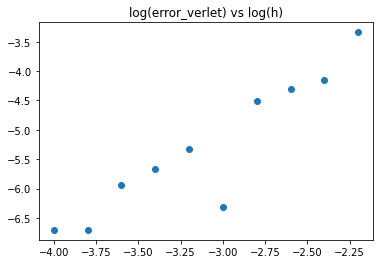

In [363]:
y_list=np.log10(error_verlet)
x_list=np.log10(h)
plt.scatter(x_list,y_list)
plt.title("log(error_verlet) vs log(h)")

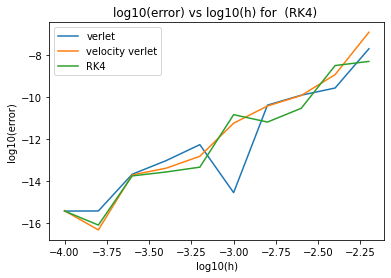

In [364]:
plt.plot(np.log10(h),np.log(error_verlet),label="verlet")
plt.plot(np.log10(h),np.log(error_vel_verlet),label="velocity verlet")
plt.plot(np.log10(h),np.log(error_rk4),label="RK4")
plt.title("log10(error) vs log10(h) for  (RK4) ")
plt.xlabel("log10(h)")
plt.ylabel("log10(error)")
plt.legend()

In [365]:
def eq_of_line(xs,p0,p1):
    return p0*xs+p1

In [366]:
from scipy.optimize import curve_fit

# verlet

Text(0.5, 1.0, 'log(error_euler) vs log(h)')

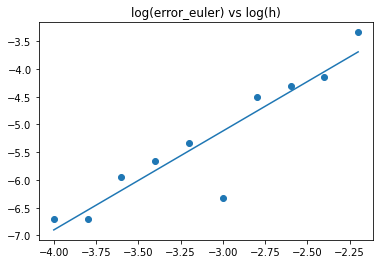

In [367]:

params,covar=curve_fit(eq_of_line,x_list,y_list)

plt.scatter(np.log10(h),y_list)
plt.plot(x_list,eq_of_line(x_list,params[0],params[1]))
plt.title("log(error_euler) vs log(h)")


In [368]:
params[0]

1.7833986449044712

# velocity verlet

In [369]:
y_list=np.log10(error_vel_verlet)
x_list=np.log10(h)

Text(0.5, 1.0, 'log(error_vel_verlet) vs log(h)')

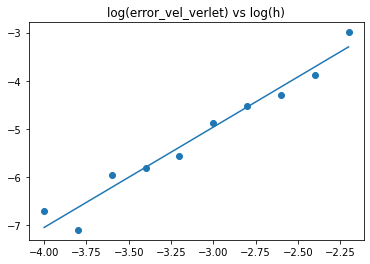

In [370]:
params,covar=curve_fit(eq_of_line,x_list,y_list)

plt.scatter(np.log10(h),y_list)
plt.plot(x_list,eq_of_line(x_list,params[0],params[1]))
plt.title("log(error_vel_verlet) vs log(h)")


In [371]:
params[0]

2.082109169186835

# rk4

In [372]:
y_list=np.log10(error_rk4)
x_list=np.log10(h)

Text(0.5, 1.0, 'log(error_rk4) vs log(h)')

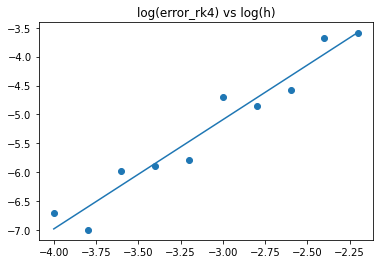

In [373]:
params,covar=curve_fit(eq_of_line,x_list,y_list)

plt.scatter(np.log10(h),y_list)
plt.plot(x_list,eq_of_line(x_list,params[0],params[1]))
plt.title("log(error_rk4) vs log(h)")


In [374]:
params[0]

1.8892725075858707

# Q2

In [375]:
xini=np.array([0,5])
yini=np.array([0,5*np.sqrt(3)])
m=2
y=2
g=9.8

In [376]:
def dx(t,xvalue):
    return np.array([xvalue[1],-(y/m)*xvalue[1]])
def ddx(t,xvalue):
    return np.array([-(y/m)*xvalue[1],((y/m)**2)*xvalue[1]])     
def dy(t,yvalue):
    return np.array([yvalue[1],-g-(y/m)*yvalue[1]])
def ddy(t,yvalue):
    return np.array([-g-(y/m)*yvalue[1],(y/m)*(g+(y/m)*yvalue[1])])

In [377]:
h=0.01
y=2
m=2
tfinal=2
t=np.arange(0,tfinal+h,h)
a,l=caller2(rk4,xini,0,tfinal,h,dx,ddx)
b,l=caller2(rk4,yini,0,tfinal,h,dy,ddy)

In [378]:
x=[]
y1=[]
j=0
for i in range(len(a)):
     if b[i][0]>=0:
      y1.append(b[i][0])
     else:
        tfinal=h*i
        print("the time when the particle just crosses y=0 is  ",tfinal)
        j=i 
        break

the time when the particle just crosses y=0 is   1.44


In [379]:
h=0.01
t=np.arange(0,tfinal+h,h)
a,l=caller2(rk4,xini,0,tfinal,h,dx,ddx)
b,l=caller2(rk4,yini,0,tfinal,h,dy,ddy)

In [380]:
x_rk4=[]
y1_rk4=[]
for i in range(j+1):
      x_rk4.append(a[i][0])
      y1_rk4.append(b[i][0])
      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


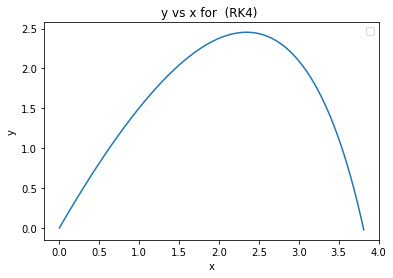

In [381]:
plt.plot(x_rk4,y1_rk4)
plt.title("y vs x for  (RK4) ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()  

In [382]:
# h=0.01
# t=np.arange(0,tfinal+h,h)
# a,l=caller1(verlet,ddx,xini,0,0,tfinal,h)
# b,l=caller1(verlet,ddy,yini,0,0,tfinal,h)
# #b,l=caller1(verlet,yini,0,tfinal,h,dy,ddy)
# #method,fn,yin,pin,tin,tf,h    

In [383]:
# x_verlet=[]
# y1_verlet=[]
# for i in range(j+1):
#       x_verlet.append(a[i][0])
#       y1_verlet.append(b[i][0])
      

In [384]:
# plt.plot(x_verlet,y1_verlet)
# plt.title("y vs x for  (verlet) ")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend()   

In [385]:
h=0.01
t=np.arange(0,tfinal+h,h)
a,l=caller2(vel_verlet,xini,0,tfinal,h,dx,ddx)
b,l=caller2(vel_verlet,yini,0,tfinal,h,dy,ddy)

In [386]:
x_vel_ver=[]
y1_vel_ver=[]
for i in range(j+1):
      x_vel_ver.append(a[i][0])
      y1_vel_ver.append(b[i][0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


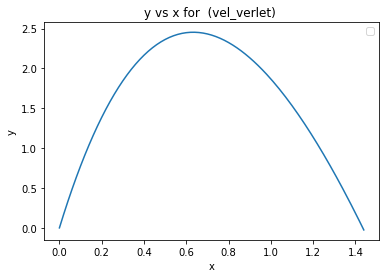

In [387]:
plt.plot(t,y1_vel_ver)
plt.title("y vs x for  (vel_verlet) ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()   

In [388]:
h=0.01
t=np.arange(0,tfinal+h,h)
a,l=caller2(euler,xini,0,tfinal,h,dx,ddx)
b,l=caller2(euler,yini,0,tfinal,h,dy,ddy)

In [389]:
x_euler=[]
y1_euler=[]
for i in range(j+1):
      x_euler.append(a[i][0])
      y1_euler.append(b[i][0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


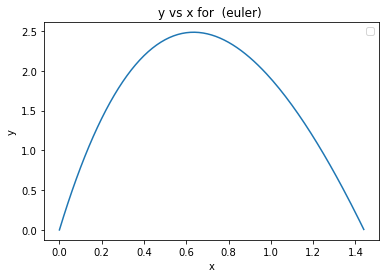

In [390]:
plt.plot(t,y1_euler)
plt.title("y vs x for  (euler) ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()   

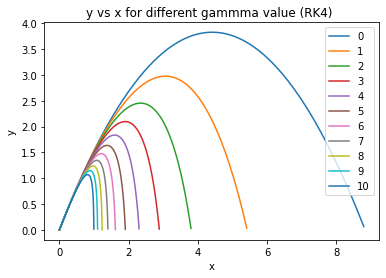

In [391]:
y=0
while y<=10:
    h=0.01
    tfinal=10
    t=np.arange(0,tfinal+h,h)
    #RK4
    a,l=caller2(rk4,xini,0,tfinal,h,dx,ddx)
    b,l=caller2(rk4,yini,0,tfinal,h,dy,ddy)
    x=[]
    y1=[]
    j=0
    for i in range(len(a)):
      y1.append(b[i][0])
      x.append(a[i][0])
    y1=np.array(y1)[(np.array(y1)>=0)]
    t1=t[0:len(y1)]
    x1=x[0:len(y1)]
    plt.plot(x1,y1,label=y) 


    y+=1 
plt.title("y vs x for different gammma value (RK4) ")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()   

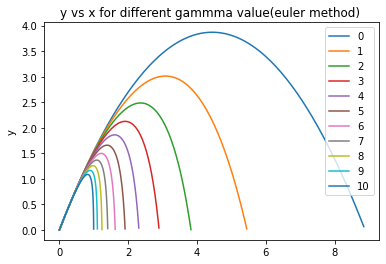

In [392]:
y=0
while y<=10:
    h=0.01
    tfinal=10
    t=np.arange(0,tfinal+h,h)
    #RK4
    a,l=caller2(euler,xini,0,tfinal,h,dx,ddx)
    b,l=caller2(euler,yini,0,tfinal,h,dy,ddy)
    x=[]
    y1=[]
    j=0
    for i in range(len(a)):
      y1.append(b[i][0])
      x.append(a[i][0])
    y1=np.array(y1)[(np.array(y1)>=0)]
    t1=t[0:len(y1)]
    x1=x[0:len(y1)]
    plt.plot(x1,y1,label=y) 


    y+=1 
plt.title("y vs x for different gammma value(euler method) ")
plt.ylabel("y")
plt.legend()     

In [393]:
# y=0
# while y<=10:
#     h=0.01
#     tfinal=10
#     t=np.arange(0,tfinal+h,h)
#     #RK4
#     a,l=caller1(verlet,xini,0,tfinal,h,dx,ddx)
#     b,l=caller1(verlet,yini,0,tfinal,h,dy,ddy)
#     x=[]
#     y1=[]
#     j=0
#     for i in range(len(a)):
#       y1.append(b[i][0])
#       x.append(a[i][0])
#     y1=np.array(y1)[(np.array(y1)>=0)]
#     t1=t[0:len(y1)]
#     x1=x[0:len(y1)]
#     plt.plot(x1,y1,label=y) 


#     y+=1 
# plt.title("y vs x for different gammma value(verlet method) ")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend()       